In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [2]:
dir_path = 'C:\Code\PlanetPal\planetpal-backend\models\Garbage classification\Garbage classification'

training_set = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2).flow_from_directory(
        directory=dir_path,
        target_size=(224, 224), # for vgg19
        batch_size=32,
        class_mode="categorical",
        classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
        subset="training"
    )

validation_set = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.2).flow_from_directory(
        directory=dir_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical",
        classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
        subset="validation"
    )

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [3]:
IMG_SHAPE = (224, 224, 3) # 224x224 with 3 channels

base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='softmax'))

80134624/80134624 [==============================] - 2s 0us/step


In [4]:
# Train model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model_details = model.fit(x=training_set, validation_data=validation_set, epochs=20, verbose=2)

loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

Epoch 1/20


KeyboardInterrupt: 

In [5]:
# Fine tune model
base_model.trainable = True
model_details = model.fit(x=training_set, validation_data=validation_set, epochs=4, verbose=2)

loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

Epoch 1/4
64/64 - 32s - loss: 0.2689 - accuracy: 0.9051 - val_loss: 0.5229 - val_accuracy: 0.8091 - 32s/epoch - 496ms/step
Epoch 2/4
64/64 - 31s - loss: 0.2622 - accuracy: 0.9081 - val_loss: 0.5138 - val_accuracy: 0.8191 - 31s/epoch - 491ms/step
Epoch 3/4
64/64 - 33s - loss: 0.2569 - accuracy: 0.9076 - val_loss: 0.5186 - val_accuracy: 0.8111 - 33s/epoch - 517ms/step
Epoch 4/4
64/64 - 31s - loss: 0.2559 - accuracy: 0.9091 - val_loss: 0.5191 - val_accuracy: 0.8151 - 31s/epoch - 486ms/step


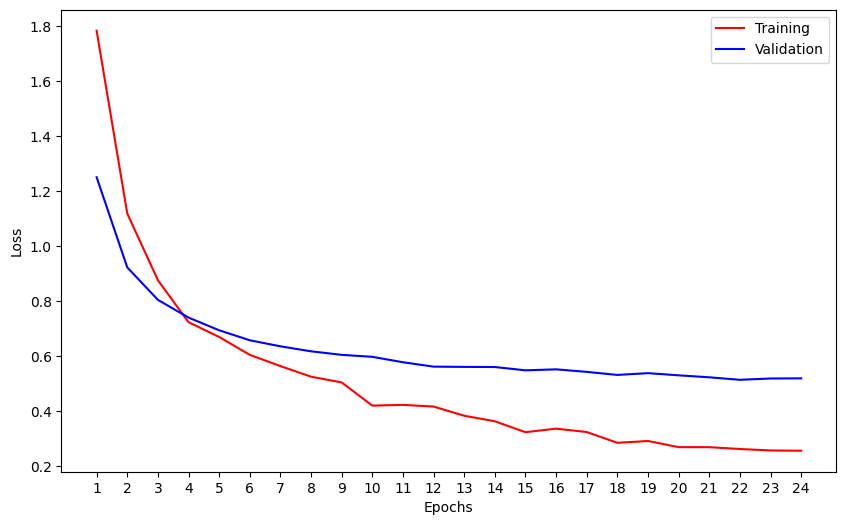

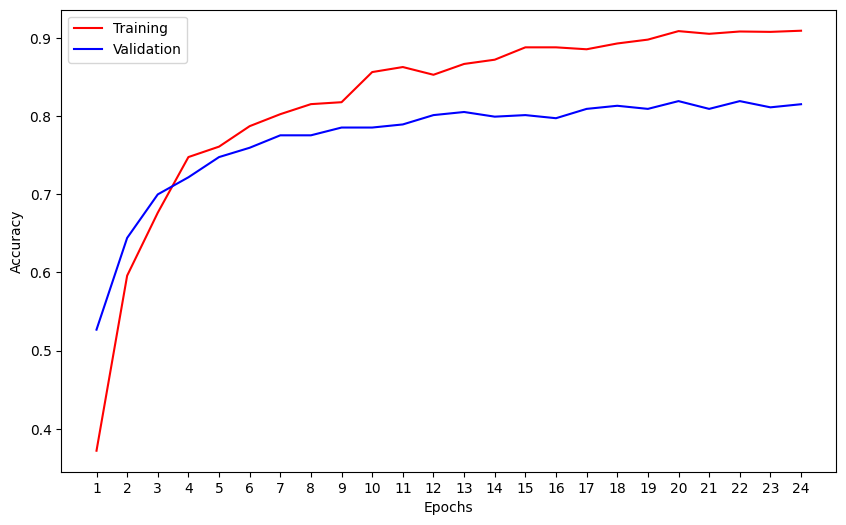

In [6]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs1,accuracy,c="red",label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs1)
plt.legend()

In [9]:
model.save("saved_models/1")